# Traverse a Tree - Introduction

In [ ]:
"""
可以不接受

做出来之后看下答案找不同的思路，然后  合上书从头把它写出来

自己先有一套方法就可以解决80%的问题，剩下的20%不用立马完美   先引子

需要可以灵活调度的方法

"""

## Pre-order Traversal

Pre-order traversal is to visit the root first. Then traverse the left subtree. Finally, traverse the right subtree. 

## In-order Traversal

In-order traversal is to traverse the left subtree first. Then visit the root. Finally, traverse the right subtree.

## Post-order Traversal

Post-order traversal is to traverse the left subtree first. Then traverse the right subtree. Finally, visit the root.

## Binary Tree Preorder Traversal

Given the root of a binary tree, return the preorder traversal of its nodes' values.

https://leetcode.com/explore/learn/card/data-structure-tree/134/traverse-a-tree/928/

#### Accepted 
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    vector<int> preorderTraversal(TreeNode* root) {
        
        
        stack<TreeNode*> s;
        set<TreeNode*> visited;
        vector<int> v;

        if(!root){
            return v;
        }

        s.push(root);        

        while(s.size()){
            TreeNode* cur = s.top();
            if(visited.find(cur) == visited.end()){
                v.push_back(cur->val);
                visited.insert(cur);
            }
            
            if(cur->left and visited.find(cur->left) == visited.end()){
                s.push(cur->left);
            }else{
                s.pop();
                if(cur->right and visited.find(cur->right) == visited.end()){
                    s.push(cur->right);
                }
            }
        } 
    return v;
        
        
        
    }
};
```

### Solutions

https://leetcode.com/problems/binary-tree-preorder-traversal/solution/

### Good one:
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    vector<int> preorderTraversal(TreeNode* root) {
        vector<int> answer;
        stack<TreeNode*> s;
        if (root) {
            s.push(root);
        }
        TreeNode* cur;
        while (!s.empty()) {
            cur = s.top();
            s.pop();
            answer.push_back(cur->val);     // visit the root
            if (cur->right) {
                s.push(cur->right);         // push right child to stack if it is not null
            }
            if (cur->left) {
                s.push(cur->left);          // push left child to stack if it is not null
            }
        }
        return answer;
    }
};
```

#### Approach 1: Iterations
```java
/* Definition for a binary tree node. */
public class TreeNode {
  int val;
  TreeNode left;
  TreeNode right;

  TreeNode(int x) {
    val = x;
  }
}


class Solution {
  public List<Integer> preorderTraversal(TreeNode root) {
    LinkedList<TreeNode> stack = new LinkedList<>();
    LinkedList<Integer> output = new LinkedList<>();
    if (root == null) {
      return output;
    }

    stack.add(root);
    while (!stack.isEmpty()) {
      TreeNode node = stack.pollLast();
      output.add(node.val);
      if (node.right != null) {
        stack.add(node.right);
      }
      if (node.left != null) {
        stack.add(node.left);
      }
    }
    return output;
  }

```

#### Approach 2: Morris traversal
```java
class Solution {
  public List<Integer> preorderTraversal(TreeNode root) {
    LinkedList<Integer> output = new LinkedList<>();

    TreeNode node = root;
    while (node != null) {
      if (node.left == null) {
        output.add(node.val);
        node = node.right;
      }
      else {
        TreeNode predecessor = node.left;
        while ((predecessor.right != null) && (predecessor.right != node)) {
          predecessor = predecessor.right;
        }

        if (predecessor.right == null) {
          output.add(node.val);
          predecessor.right = node;
          node = node.left;
        }
        else{
          predecessor.right = null;
          node = node.right;
        }
      }
    }
    return output;
  }
}
```

## Binary Tree Inorder Traversal

https://leetcode.com/explore/learn/card/data-structure-tree/134/traverse-a-tree/929/

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    vector<int> inorderTraversal(TreeNode* root) {
        stack<TreeNode*> s;
        set<TreeNode*> visited;
        vector<int> v;
        
        if(!root){
            return v;
        }
        
        s.push(root);        

        while(s.size()){
            TreeNode* cur = s.top();
            if(cur->left and visited.find(cur->left) == visited.end()){
                s.push(cur->left);
            }else{
                v.push_back(cur->val);
                visited.insert(cur);
                s.pop();
                if(cur->right and visited.find(cur->right) == visited.end()){
                    s.push(cur->right);
                }
            }
        } 
    return v;
    }
};

```

#### Good one
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    vector<int> inorderTraversal(TreeNode* root) {
        stack<TreeNode*> s;
        vector<int> v;
        
        TreeNode* cur = root;
        while(cur != NULL or s.size()!=0){
            while(cur != NULL){
                s.push(cur);
                cur = cur->left;
            }
            cur = s.top();
            v.push_back(cur->val); 
            s.pop();  // 这里这个值被直接抽调了  所以不会影响  巧
            cur = cur->right;
            
        }

    return v;
    }
};
```

### Solutions


#### Approach 1: Recursive Approach
```java
class Solution {
    public List < Integer > inorderTraversal(TreeNode root) {
        List < Integer > res = new ArrayList < > ();
        helper(root, res);
        return res;
    }

    public void helper(TreeNode root, List < Integer > res) {
        if (root != null) {
            if (root.left != null) {
                helper(root.left, res);
            }
            res.add(root.val);
            if (root.right != null) {
                helper(root.right, res);
            }
        }
    }
}
```

#### Approach 2: Iterating method using Stack
```java
public class Solution {
    public List < Integer > inorderTraversal(TreeNode root) {
        List < Integer > res = new ArrayList < > ();
        Stack < TreeNode > stack = new Stack < > ();
        TreeNode curr = root;
        while (curr != null || !stack.isEmpty()) {
            while (curr != null) {
                stack.push(curr);
                curr = curr.left;
            }
            curr = stack.pop();
            res.add(curr.val);
            curr = curr.right;
        }
        return res;
    }
}
```

## Binary Tree Postorder Traversal

https://leetcode.com/explore/learn/card/data-structure-tree/134/traverse-a-tree/930/

Given the root of a binary tree, return the postorder traversal of its nodes' values.

#### Accepted
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    vector<int> postorderTraversal(TreeNode* root) {
        
    
        stack<TreeNode*> s;
        set<TreeNode*> visited;
        vector<int> v;

        if(!root){
            return v;
        }

        s.push(root);        

        while(s.size()){
            TreeNode* cur = s.top();
            
            
            if(cur->left and visited.find(cur->left) == visited.end()){
                s.push(cur->left);
            }else if(cur->right and visited.find(cur->right) == visited.end()){
                s.push(cur->right);
                
            }else{
                v.push_back(cur->val);
                visited.insert(cur);
                s.pop();
            }
        } 
    return v;  
        
        
    }
};

```

### Solution
#### Recurse

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    void traverse(TreeNode* root, vector<int>& result){
        if (root == NULL){
            return;
        }
        
        traverse(root->left, result);
        traverse(root->right, result);
        result.push_back(root->val);
    }
    vector<int> postorderTraversal(TreeNode* root) {
        vector<int> result;
        traverse(root, result);
        return result;
    }
};
```

## Binary Tree Traversal - Solution

https://leetcode.com/explore/learn/card/data-structure-tree/134/traverse-a-tree/1036/

### Pre-order Traversal - Recursive Solution

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
private:
    void preorderTraversal(TreeNode* root, vector<int>& answer) {
        if (!root) {
            return;
        }
        answer.push_back(root->val);               // visit the root
        preorderTraversal(root->left, answer);     // traverse left subtree
        preorderTraversal(root->right, answer);    // traverse right subtree
    }
public:
    vector<int> preorderTraversal(TreeNode* root) {
        vector<int> answer;
        preorderTraversal(root, answer);
        return answer;
    }
};

```

### In-order Traversal - Recursive Solution
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
private:
    void inorderTraversal(TreeNode* root, vector<int>& answer) {
        if (!root) {
            return;
        }
        inorderTraversal(root->left, answer);     // traverse left subtree
        answer.push_back(root->val);              // visit the root
        inorderTraversal(root->right, answer);    // traverse right subtree
    }
public:
    vector<int> inorderTraversal(TreeNode* root) {
        vector<int> answer;
        inorderTraversal(root, answer);
        return answer;   
    }
};
```

### Post-order Traversal - Recursive Solution

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
private:
    void postorderTraversal(TreeNode* root, vector<int>& answer) {
        if (!root) {
            return;
        }
        postorderTraversal(root->left, answer);     // traverse left subtree
        postorderTraversal(root->right, answer);    // traverse right subtree
        answer.push_back(root->val);                // visit the root
    }
public:
    vector<int> postorderTraversal(TreeNode* root) {
        vector<int> answer;
        postorderTraversal(root, answer);
        return answer;   
    }
};
```

## Iterative Solution

There are several iterative solutions for tree traversal. One of the solutions is to use a stack to simulate the recursion process.

Taking pre-order traversal as an example, in each iteration, we pop one node from the stack and visit this node. Then if this node has a right child, push its right child into the stack. If this node has a left child, push its left child into the stack. It is noteworthy that we push the right child first so that we can visit the left child first since the nature of the stack is LIFO(last in first out). After that, we can continue to the next iteration until the stack is empty.

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    vector<int> preorderTraversal(TreeNode* root) {
        vector<int> answer;
        stack<TreeNode*> s;
        if (root) {
            s.push(root);
        }
        TreeNode* cur;
        while (!s.empty()) {
            cur = s.top();
            s.pop();
            answer.push_back(cur->val);     // visit the root
            if (cur->right) {
                s.push(cur->right);         // push right child to stack if it is not null
            }
            if (cur->left) {
                s.push(cur->left);          // push left child to stack if it is not null
            }
        }
        return answer;
    }
};
```

## Level-order Traversal - Introduction

Level-order traversal is to traverse the tree level by level.

Breadth-First Search is an algorithm to traverse or search in data structures like a tree or a graph. The algorithm starts with a root node and visit the node itself first. Then traverse its neighbors, traverse its second level neighbors, traverse its third level neighbors, so on and so forth.

When we do breadth-first search in a tree, the order of the nodes we visited is in level order.

Here is an example of level-order traversal:

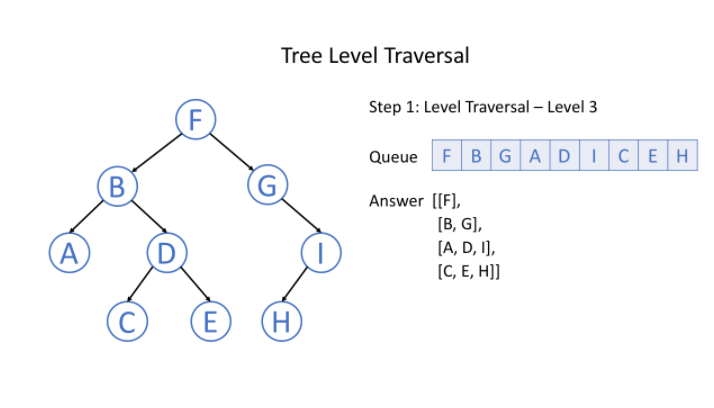

Typically, we use a queue to help us to do BFS. 

## Binary Tree Level Order Traversal

https://leetcode.com/explore/learn/card/data-structure-tree/134/traverse-a-tree/931/

Given the root of a binary tree, return the level order traversal of its nodes' values. (i.e., from left to right, level by level).

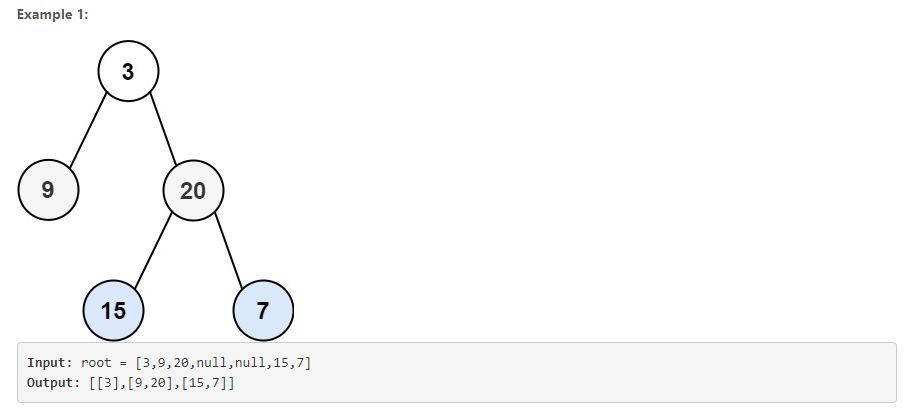

#### Accepted 1 BFS

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    vector<vector<int>> levelOrder(TreeNode* root) {
        queue<TreeNode*> q1;
        queue<TreeNode*> q2;
        q1.push(root);
        vector<vector<int>> v;
        
        if(!root){
            return v;
        }
        
        while(q1.size() or q2.size()){
            vector<int> v1;
            while(q1.size()){
                TreeNode* cur = q1.front();
                q1.pop();
                v1.push_back(cur->val);
                if(cur->left){
                    q2.push(cur->left);
                }
                if(cur->right){
                    q2.push(cur->right);
                }
            }
            if(v1.size()){
                v.push_back(v1);
            }
            
            vector<int> v2;
            while(q2.size()){
                TreeNode* cur = q2.front();
                q2.pop();
                v2.push_back(cur->val);
                if(cur->left){
                    q1.push(cur->left);
                }
                if(cur->right){
                    q1.push(cur->right);
                }
            }
            if(v2.size()){
            v.push_back(v2);
            }
            
        }
            
        return v;
    }
};
```

#### Accpetd Recursion with levels as indicator
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    void BFS(TreeNode* cur, vector<vector<int>>& v, int levels){
        
        if(!cur){
            return;
        }
        
        if(v.size()==levels){
         vector<int> level;
         v.push_back(level);   
        }
        
        v[levels].push_back(cur->val);
        
        if(cur->left){
            BFS(cur->left, v, levels+1);
        }
        
        if(cur->right){
            BFS(cur->right, v, levels+1);
        }
        
        
    }
    
    
    vector<vector<int>> levelOrder(TreeNode* root) {

        vector<vector<int>> v;
        BFS(root, v, 0);
        return v;
    }
};
```

### Solutions
https://leetcode.com/problems/binary-tree-level-order-traversal/solution/

#### Standard
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    vector<vector<int>> levelOrder(TreeNode* root) {
        vector<vector<int>> ans;
        queue<TreeNode*> q;
        if (root) {
            q.push(root);
        }
        TreeNode* cur;
        while (!q.empty()) {
            int size = q.size();
            ans.push_back(vector<int>());
            for (int i = 0; i < size; ++i) {		// traverse nodes in the same level
                cur = q.front();
                q.pop();
                ans.back().push_back(cur->val);		// visit the root
                if (cur->left) {
                    q.push(cur->left);				// push left child to queue if it is not null
                }
                if (cur->right) {
                    q.push(cur->right);				// push right child to queue if it is not null
                }
            }
        }
        return ans;
    }
};
```

#### Approach 1: Recursion

```java
class Solution {
    List<List<Integer>> levels = new ArrayList<List<Integer>>();

    public void helper(TreeNode node, int level) {
        // start the current level
        if (levels.size() == level)
            levels.add(new ArrayList<Integer>());

         // fulfil the current level
         levels.get(level).add(node.val);

         // process child nodes for the next level
         if (node.left != null)
            helper(node.left, level + 1);
         if (node.right != null)
            helper(node.right, level + 1);
    }
    
    public List<List<Integer>> levelOrder(TreeNode root) {
        if (root == null) return levels;
        helper(root, 0);
        return levels;
    }
}

```

#### Approach 2: Iteration

```java
class Solution {
  public List<List<Integer>> levelOrder(TreeNode root) {
    List<List<Integer>> levels = new ArrayList<List<Integer>>();
    if (root == null) return levels;

    Queue<TreeNode> queue = new LinkedList<TreeNode>();
    queue.add(root);
    int level = 0;
    while ( !queue.isEmpty() ) {
      // start the current level
      levels.add(new ArrayList<Integer>());

      // number of elements in the current level
      int level_length = queue.size();
      for(int i = 0; i < level_length; ++i) {
        TreeNode node = queue.remove();

        // fulfill the current level
        levels.get(level).add(node.val);

        // add child nodes of the current level
        // in the queue for the next level
        if (node.left != null) queue.add(node.left);
        if (node.right != null) queue.add(node.right);
      }
      // go to next level
      level++;
    }
    return levels;
  }
}
```